# Principal component analysis

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [56]:
df=pd.read_csv('Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [57]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [58]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [59]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [60]:
# dropping the y column
new_df=df.drop(columns='Customer_Segment')

In [61]:
new_df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [62]:
new_df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#  variation inflation factor (VIF) checks influence between independent features 

In [64]:
X = new_df.values

In [65]:
X.shape

(178, 13)

In [66]:
#perform data transformation so all columns are in same standard range
sc = StandardScaler()
sc_X = sc.fit_transform(X)

In [67]:
# check the variance inflationfactor
[(i, variance_inflation_factor(sc_X,i)) for i in range(X.shape[1])]

# since column 6 has more inflation which means it is multi colinear or influence other attribute 
# hence we drop this column

[(0, 2.4603715013670464),
 (1, 1.6566474693528113),
 (2, 2.1854479260672437),
 (3, 2.2387320843726632),
 (4, 1.4178547071068388),
 (5, 4.334518629464141),
 (6, 7.029349970593788),
 (7, 1.7963797768434993),
 (8, 1.9756830276485566),
 (9, 3.026303599660605),
 (10, 2.5514471756364916),
 (11, 3.785473466860991),
 (12, 2.823849057907573)]

In [68]:
# Column no 6 is flavanoids. VIF is > 5, so drop that column

In [69]:
new_df.drop(columns='Flavanoids', inplace=True)
new_df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [70]:
# after dropping column again do standard scaling  check VIF 

In [71]:
X = new_df.values
print(X.shape)
sc_X = sc.fit_transform(X)

(178, 12)


In [72]:
[(i, variance_inflation_factor(sc_X,i)) for i in range(X.shape[1])]

[(0, 2.4602629469791397),
 (1, 1.6410282769728577),
 (2, 2.0565378708012707),
 (3, 2.1962670597196143),
 (4, 1.3996531638370666),
 (5, 2.9597070892107116),
 (6, 1.6872157732027468),
 (7, 1.7895469344670216),
 (8, 3.0263031680977726),
 (9, 2.480598868768466),
 (10, 3.4199724142467396),
 (11, 2.817467416098933)]

In [73]:
model = PCA(n_components=2)
x_pca = model.fit_transform(sc_X)
x_pca.shape
# n_components is number of component of feature or column we want

(178, 2)

In [74]:
# each component orthogonal to previous component
# all 12 rows decompoese in 2 rows such a way that maz info gain in that column using eigen value and wigen vector


# by using all 12 feature the net varience is check where it went to one direction and that direction is chosen for pca 1

# and 2nd pca or pca-2 is orthogonal to pca 1

In [75]:
model.explained_variance_ratio_
# first feature (pca-1) hold 36 % info and 2nd feature (pca-2) get 19% info

array([0.32528185, 0.20807784])

In [76]:
np.cumsum(model.explained_variance_ratio_)
# cumulited sum

array([0.32528185, 0.53335969])

In [52]:
model.components_

array([[ 0.16662311, -0.27934476, -0.02370158, -0.28417931,  0.16729835,
         0.41809434, -0.33492999,  0.33565192, -0.09519343,  0.32937266,
         0.40256828,  0.32502665],
       [-0.48284477, -0.22624548, -0.31664825,  0.0089848 , -0.29882049,
        -0.06364516, -0.03026597, -0.03814281, -0.53033947,  0.28060561,
         0.16590321, -0.36343973]])

In [53]:
model.components_.shape

(2, 12)

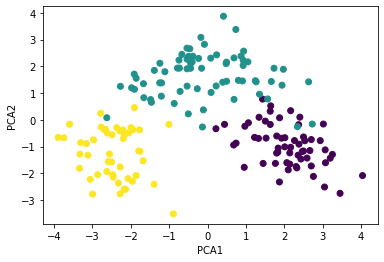

In [54]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['Customer_Segment'])
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()